In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/mtcars.csv")

In [3]:
df

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [12]:
#Hipotese, 1 se wt tem crescimento acelerado com comportamento exponencial, a função inversa log deve lineariza-la
df['log_wt'] = np.log(df['wt'])
df

#Hipotese 2, wt pode ser modelado com comportamento de uma curva quadratica (ou polinomial)


,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,log_wt
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0.963174
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1.056053
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,0.841567
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1.167827
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1.235471
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,1.241269
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,1.272566
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1.160021
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,1.147402
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,1.235471


<Axes: xlabel='wt', ylabel='mpg'>

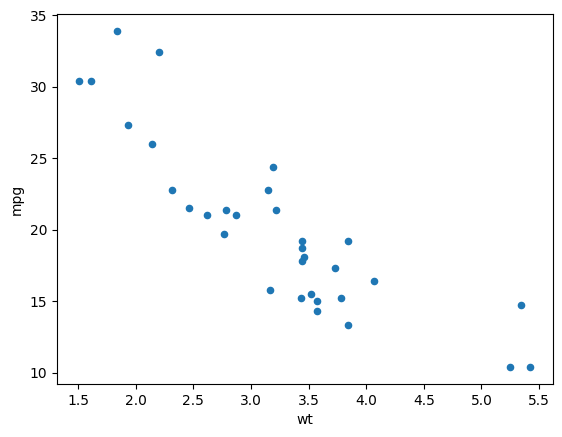

In [4]:
df.plot.scatter(x='wt', y='mpg')

<Axes: xlabel='log_wt', ylabel='mpg'>

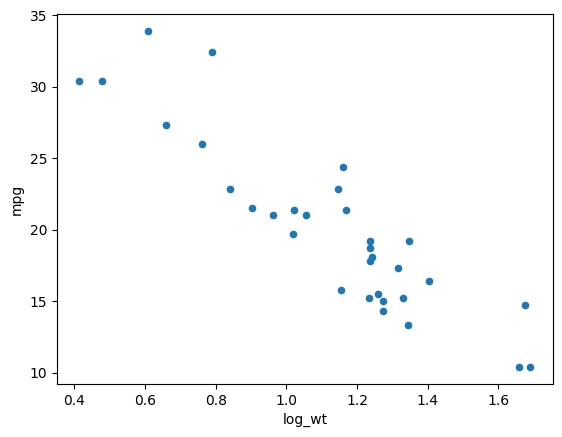

In [13]:
df.plot.scatter(x='log_wt', y='mpg')

In [14]:
#Matriz de correlação
dfn = df.select_dtypes(include=[ np.number])
dfn.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,log_wt
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925,-0.900081
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988,0.801618
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977,0.863715
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812,0.663691
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790,-0.731244
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606,0.978822
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249,-0.180540
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607,-0.564760
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534,-0.721678
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073,-0.584099


In [20]:
#Separacão de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(df[['wt']], df.mpg, test_size=0.25, random_state=1)

x_treino

,wt
19,1.835
14,5.250
24,3.845
10,3.440
20,2.465
26,2.140
4,3.440
2,2.320
25,1.935
6,3.570


In [23]:
#Modelo de regressão linear

modelo = LinearRegression()
modelo.fit(x_treino, y_treino)

# R2, mais proximo de 1 é melhor
print(modelo.score(x_treino, y_treino))

0.7528863794404006


In [28]:
# Erro de previsão

y_prev = modelo.predict(x_teste)
print(mse(y_teste, y_prev))

16.638500787793586
